# Scaling - Cross Validation - Gridsearch

# Regularization (Ridge, Lasso, ElasticNet)

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [541]:
df = pd.read_csv("Advertising.csv")

In [542]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [543]:
X = df.drop(columns = "sales", axis =1)
y = df["sales"]

## Polynomial Conversion

In [544]:
from sklearn.preprocessing import PolynomialFeatures

I create an artificial overfiting situation by taking poly feature from 5 degrees

In [545]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [546]:
poly_features.shape

(200, 55)

## Train | Test Split

In [547]:
from sklearn.model_selection import train_test_split

In [548]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

**Scaling :** Fitting our data to the same ranges.Büyük ve küçüğü aynı aralığa çekmek.

The ranges of my features can have different range values for each. If we don't do a scale, features in a large range are weighted more (valid for distance-based models) and our model will return incorrect results. We use scale to prevent this. It also accelerates the work of Gradient descent-based models such as linear, logistic regression and accurately detects which features are important.

**Advise:**

There is no disadvantage of applying scale to data.If you are confused about whether to apply it or not, you can apply scale directly.

**Data leakage:** Leakage of information about the data in the test set to the data in the train set

To prevent leakage, only fit operation is applied to X_train. Only transform operation is applied to X_test. No fit operation is applied to all data.

**Target is never scaled.**

In [549]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    #Robustscaler is used when the outlier could be present.
                                                                                #Normal dağılım varsa standardscaler uygularım.Ama hepsini denemekte fayda var.
                                                                                #df de değerlerin range çok dağılmamışsa uygulanmayabilir.
                                
scaler = StandardScaler()

In [550]:
scaler.fit(X_train)   #Apply just for X_train not for X_test(Kalıp çıkarma)

StandardScaler()

In [551]:
X_train_scaled = scaler.transform(X_train)  #Apply transform according to fit.
X_train_scaled


array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [552]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.Bu değerler, normal dağılımda z puanında nereye karşılık geldiklerini gösterir.

In [553]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004


In [554]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))   # ranges similar
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : -1.7916507161660318 - 9.789936722396414
X_test_range   : -1.7512984134905472 - 16.318062745336793


## Linear Regression

In [555]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [556]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [557]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [558]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [559]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


## Multicolineratiy

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [560]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not

**Cross validation is only applied to the train set.

In [561]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [562]:
from sklearn.model_selection import cross_validate, cross_val_score

In [563]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [564]:
scores

{'fit_time': array([0.01003766, 0.00447726, 0.00372934, 0.00415754, 0.00539494]),
 'score_time': array([0.0018084 , 0.00183129, 0.00170016, 0.00162363, 0.0024209 ]),
 'test_neg_mean_absolute_error': array([-1.27124712, -0.71046265, -0.39503284, -0.41897731, -1.47409318]),
 'test_neg_mean_squared_error': array([-19.20425854,  -2.71329198,  -0.62290055,  -0.28936097,
        -15.40985579]),
 'test_neg_root_mean_squared_error': array([-4.38226637, -1.64720733, -0.78924049, -0.53792283, -3.92553892]),
 'test_r2': array([0.36790198, 0.87965778, 0.97756048, 0.98936937, 0.16659583])}

In [565]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.010038,0.001808,0.367902,-1.271247,-19.204259,-4.382266
2,0.004477,0.001831,0.879658,-0.710463,-2.713292,-1.647207
3,0.003729,0.001700,0.977560,-0.395033,-0.622901,-0.789240
4,0.004158,0.001624,0.989369,-0.418977,-0.289361,-0.537923
5,0.005395,0.002421,0.166596,-1.474093,-15.409856,-3.925539


In [566]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()   #her sütunun ayrı ayrı meanını aldık.

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

In [567]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


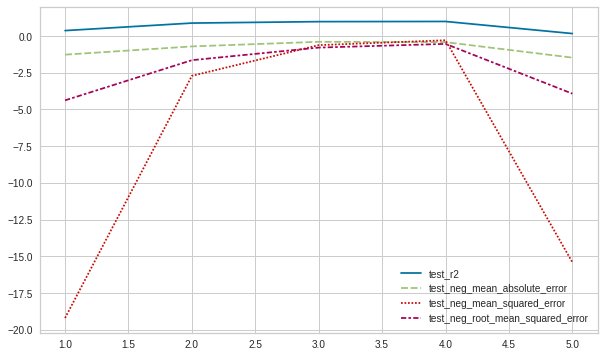

In [568]:
sns.lineplot(data=scores.iloc[:,2:]);   #score time ve fit time göstergelerini almamak için iloc yaptım sadece.

## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting (If there is an underfiting caused by the alpha parameter) and overfiting.

In [569]:
from sklearn.linear_model import Ridge

In [570]:
ridge_model = Ridge(alpha=1,random_state=42)

In [571]:
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=1, random_state=42)

In [572]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [573]:
rs = train_val(y_train,y_train_pred,y_test,y_pred,"ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [574]:
pd.concat([ls,rs],axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


## For Ridge Regression CV with alpha : 1

In [575]:
model = Ridge(alpha=1)
scores = cross_validate(model,X_train_scaled,y_train,scoring = ["r2","neg_mean_absolute_error","neg_mean_squared_error",'neg_root_mean_squared_error'],cv=5)

In [576]:
scores = pd.DataFrame(scores,index=range(1,6))

In [577]:
scores.mean()  # time görmemek için scores.iloc[:,2:].mean()

fit_time                            0.002034
score_time                          0.001546
test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

In [578]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


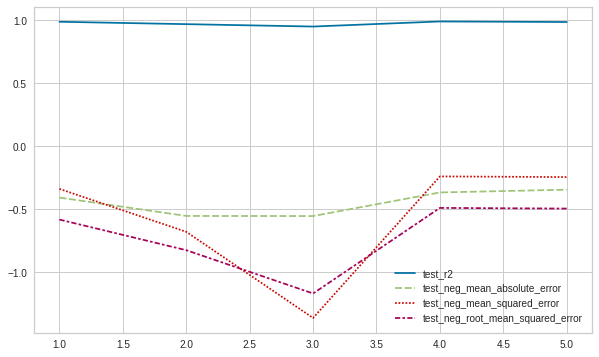

In [579]:
sns.lineplot(data=scores.iloc[:,2:]);

## Choosing best alpha value with GridSearchCV for Ridge

In [580]:
from sklearn.model_selection import GridSearchCV

In [581]:
alpha_s = np.linspace(0.01,1,100)
alpha_s

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [582]:
ridge_model = Ridge()

In [583]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = {"alpha":alpha_s}, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [584]:
grid_ridge.fit(X_train_scaled,y_train) # model = Ridge(alpha=0.02) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.03; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [585]:
grid_ridge.best_params_

{'alpha': 0.02}

In [586]:
pd.DataFrame(grid_ridge.cv_results_).iloc[:,5:]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,{'alpha': 0.01},-0.518606,-0.624971,-0.910620,-0.339656,-0.933538,-0.665478,0.228615,2
1,{'alpha': 0.02},-0.528210,-0.703714,-0.924518,-0.361020,-0.747742,-0.653041,0.192922,1
2,{'alpha': 0.03},-0.528137,-0.836368,-0.933557,-0.375386,-0.686297,-0.671949,0.202143,3
3,{'alpha': 0.04},-0.525769,-0.941019,-0.940437,-0.385200,-0.655755,-0.689636,0.222160,4
4,{'alpha': 0.05},-0.523123,-1.018323,-0.946164,-0.392289,-0.636651,-0.703310,0.241601,5
...,...,...,...,...,...,...,...,...,...
95,{'alpha': 0.9600000000000001},-0.576996,-0.834834,-1.160561,-0.484195,-0.492678,-0.709853,0.258649,20
96,{'alpha': 0.97},-0.577844,-0.831836,-1.162070,-0.485090,-0.492751,-0.709918,0.258634,22
97,{'alpha': 0.98},-0.578691,-0.828881,-1.163568,-0.485984,-0.492833,-0.709991,0.258629,23
98,{'alpha': 0.99},-0.579536,-0.825969,-1.165055,-0.486877,-0.492924,-0.710072,0.258631,25


In [587]:
grid_ridge.best_index_

1

In [588]:
grid_ridge.best_score_

-0.6530406519552931

In [589]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [590]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [591]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


## LASSO

In [592]:
from sklearn.linear_model import Lasso

In [593]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=1)

In [594]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred= lasso_model.predict(X_train_scaled)

In [595]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [596]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


## For Lasso CV with Default Alpha : 1

In [597]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [598]:
scores = pd.DataFrame(scores,index=range(1,6)).iloc[:,2:]

In [599]:
scores.mean()

test_r2                             0.913588
test_neg_mean_absolute_error       -1.039253
test_neg_mean_squared_error        -2.202186
test_neg_root_mean_squared_error   -1.458877
dtype: float64

In [600]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


## Choosing best alpha value with GridSearchCV for Lasso

In [601]:
lasso_model = Lasso(max_iter=100000)

In [602]:
grid_lasso = GridSearchCV(estimator=lasso_model,param_grid={"alpha":alpha_s},scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [603]:
grid_lasso.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.03; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [604]:
grid_lasso.best_params_

{'alpha': 0.01}

In [605]:
pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008271,0.000965,0.000780,0.000167,0.01,{'alpha': 0.01},-0.451422,-0.492426,-1.094927,-0.428596,-0.486989,-0.590872,0.253114,1
1,0.004194,0.001054,0.000515,0.000054,0.02,{'alpha': 0.02},-0.527674,-0.582227,-1.189833,-0.540978,-0.503119,-0.668766,0.261792,2
2,0.002488,0.000166,0.000440,0.000021,0.03,{'alpha': 0.03},-0.596819,-0.639995,-1.184775,-0.628898,-0.551168,-0.720331,0.234262,3
3,0.002578,0.000270,0.000451,0.000022,0.04,{'alpha': 0.04},-0.610588,-0.657635,-1.190642,-0.666960,-0.544207,-0.734006,0.232422,4
4,0.002998,0.000498,0.000465,0.000026,0.05,{'alpha': 0.05},-0.624642,-0.677866,-1.227326,-0.719020,-0.545109,-0.758793,0.241376,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001769,0.000147,0.000424,0.000022,0.96,{'alpha': 0.9600000000000001},-1.478728,-0.974255,-1.728608,-1.643950,-1.298221,-1.424752,0.269164,96
96,0.001668,0.000022,0.000404,0.000014,0.97,{'alpha': 0.97},-1.488273,-0.980630,-1.736566,-1.653150,-1.307507,-1.433225,0.269837,97
97,0.001833,0.000234,0.000426,0.000035,0.98,{'alpha': 0.98},-1.497847,-0.987091,-1.744562,-1.662375,-1.316822,-1.441739,0.270496,98
98,0.001898,0.000155,0.000577,0.000204,0.99,{'alpha': 0.99},-1.507452,-0.993636,-1.752596,-1.671626,-1.326165,-1.450295,0.271141,99


In [606]:
grid_lasso.best_index_

0

In [607]:
grid_lasso.best_score_

-0.5908719878682445

In [608]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [609]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [610]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028


## Elastic net

In [611]:
from sklearn.linear_model import ElasticNet

In [612]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [613]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)


In [614]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es


,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [615]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [616]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [617]:
scores = pd.DataFrame(scores, index = range(1, 6)).iloc[:,2:]
scores


,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.915497,-1.255282,-2.567362,-1.602299
2,0.928138,-0.960011,-1.620225,-1.272881
3,0.855390,-1.373843,-4.014250,-2.003559
4,0.875648,-1.431847,-3.384817,-1.839787
5,0.840262,-1.449269,-2.953597,-1.718603


In [618]:
scores.mean()

test_r2                             0.882987
test_neg_mean_absolute_error       -1.294050
test_neg_mean_squared_error        -2.908050
test_neg_root_mean_squared_error   -1.687426
dtype: float64

In [619]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


## Choosing best alpha value with GridSearchCV for Elastic-Net

In [620]:
from sklearn.model_selection import GridSearchCV 

In [621]:
elastic_model = ElasticNet(max_iter=10000)

In [622]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [623]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',                    #verbose iki trainde bir açıklama göster.
                          cv =5, verbose =2)                                                                                             #False yazarsan aşağıdaki açıklama gelmez.
         

In [624]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [625]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [626]:
pd.DataFrame(grid_model.cv_results_)   #rank 1 best

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017553,0.001729,0.001022,0.000690,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.586201,-0.693806,-1.184123,-0.491352,-0.490280,-0.689152,0.258570,13
1,0.004330,0.000980,0.000495,0.000036,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.553277,-0.537915,-1.172816,-0.488299,-0.493055,-0.649072,0.263070,10
2,0.004834,0.000932,0.000484,0.000021,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.529432,-0.527849,-1.157311,-0.480464,-0.500409,-0.639093,0.259749,9
3,0.005884,0.000899,0.000498,0.000023,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.490240,-0.504487,-1.120156,-0.446524,-0.484072,-0.609096,0.256247,6
4,0.007469,0.002000,0.000630,0.000180,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.470398,-0.497256,-1.110933,-0.437316,-0.481998,-0.599580,0.256435,3
5,0.006057,0.001696,0.000491,0.000024,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.455118,-0.493277,-1.098376,-0.430248,-0.484677,-0.592339,0.254000,2
6,0.006762,0.001772,0.000591,0.000139,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.451422,-0.492426,-1.094927,-0.428596,-0.486989,-0.590872,0.253114,1
7,0.012870,0.005437,0.000579,0.000051,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.606883,-0.654207,-1.214541,-0.509165,-0.495180,-0.695995,0.266011,14
8,0.005282,0.001804,0.000523,0.000011,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.573940,-0.553763,-1.195471,-0.509639,-0.498213,-0.666205,0.266088,12
9,0.004316,0.000381,0.000460,0.000025,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.552026,-0.551934,-1.180732,-0.504933,-0.506986,-0.659322,0.261517,11


In [627]:
grid_model.best_index_

6

In [628]:
grid_model.best_score_

-0.5908719878682445

In [629]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [630]:
elGS = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

In [631]:
pd.concat([ls, rs, rgs, lss, lgs, elGS], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,GridSearch_train,GridSearch_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,0.542308,0.622028


## Using Best Hyper Parameters From GridSearch

In [632]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [633]:
train_val(y_train,y_train_pred,y_test,y_pred,"GridSearch")

,GridSearch_train,GridSearch_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


## Final Model

In [634]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [635]:
final_model = Lasso(alpha=0.01) #grid_lasso

In [636]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Prediction

In [637]:
new_sample = [[120, 30, 15]]

In [638]:
poly_sample = polynomial_converter.transform(new_sample)
poly_sample

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([[1.20000e+02, 3.00000e+01, 1.50000e+01, 1.44000e+04, 3.60000e+03,
        1.80000e+03, 9.00000e+02, 4.50000e+02, 2.25000e+02, 1.72800e+06,
        4.32000e+05, 2.16000e+05, 1.08000e+05, 5.40000e+04, 2.70000e+04,
        2.70000e+04, 1.35000e+04, 6.75000e+03, 3.37500e+03, 2.07360e+08,
        5.18400e+07, 2.59200e+07, 1.29600e+07, 6.48000e+06, 3.24000e+06,
        3.24000e+06, 1.62000e+06, 8.10000e+05, 4.05000e+05, 8.10000e+05,
        4.05000e+05, 2.02500e+05, 1.01250e+05, 5.06250e+04, 2.48832e+10,
        6.22080e+09, 3.11040e+09, 1.55520e+09, 7.77600e+08, 3.88800e+08,
        3.88800e+08, 1.94400e+08, 9.72000e+07, 4.86000e+07, 9.72000e+07,
        4.86000e+07, 2.43000e+07, 1.21500e+07, 6.07500e+06, 2.43000e+07,
        1.21500e+07, 6.07500e+06, 3.03750e+06, 1.51875e+06, 7.59375e+05]])

In [639]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[-0.31577196,  0.4548387 , -0.71597883, -0.57077539,  0.03272058,
        -0.57592103,  0.19000979, -0.40058135, -0.63510616, -0.65720536,
        -0.31206336, -0.55202038, -0.04766154, -0.38643187, -0.51941065,
        -0.03520625, -0.38068747, -0.49999458, -0.46689176, -0.65648983,
        -0.45750129, -0.52191971, -0.28669542, -0.40502644, -0.43636671,
        -0.15916772, -0.36507868, -0.43033507, -0.40034085, -0.19390994,
        -0.3974766 , -0.46387749, -0.40709947, -0.3333081 , -0.6202272 ,
        -0.49586916, -0.48043767, -0.39338379, -0.3965582 , -0.38051123,
        -0.3064592 , -0.37269676, -0.36480616, -0.32445027, -0.24449599,
        -0.37174771, -0.40748233, -0.35630191, -0.30216523, -0.29498002,
        -0.41062561, -0.44776182, -0.39109921, -0.3048257 , -0.24565976]])

In [640]:
final_model.predict(scaled_sample)

array([14.49345346])

## Feature importances with Ridge

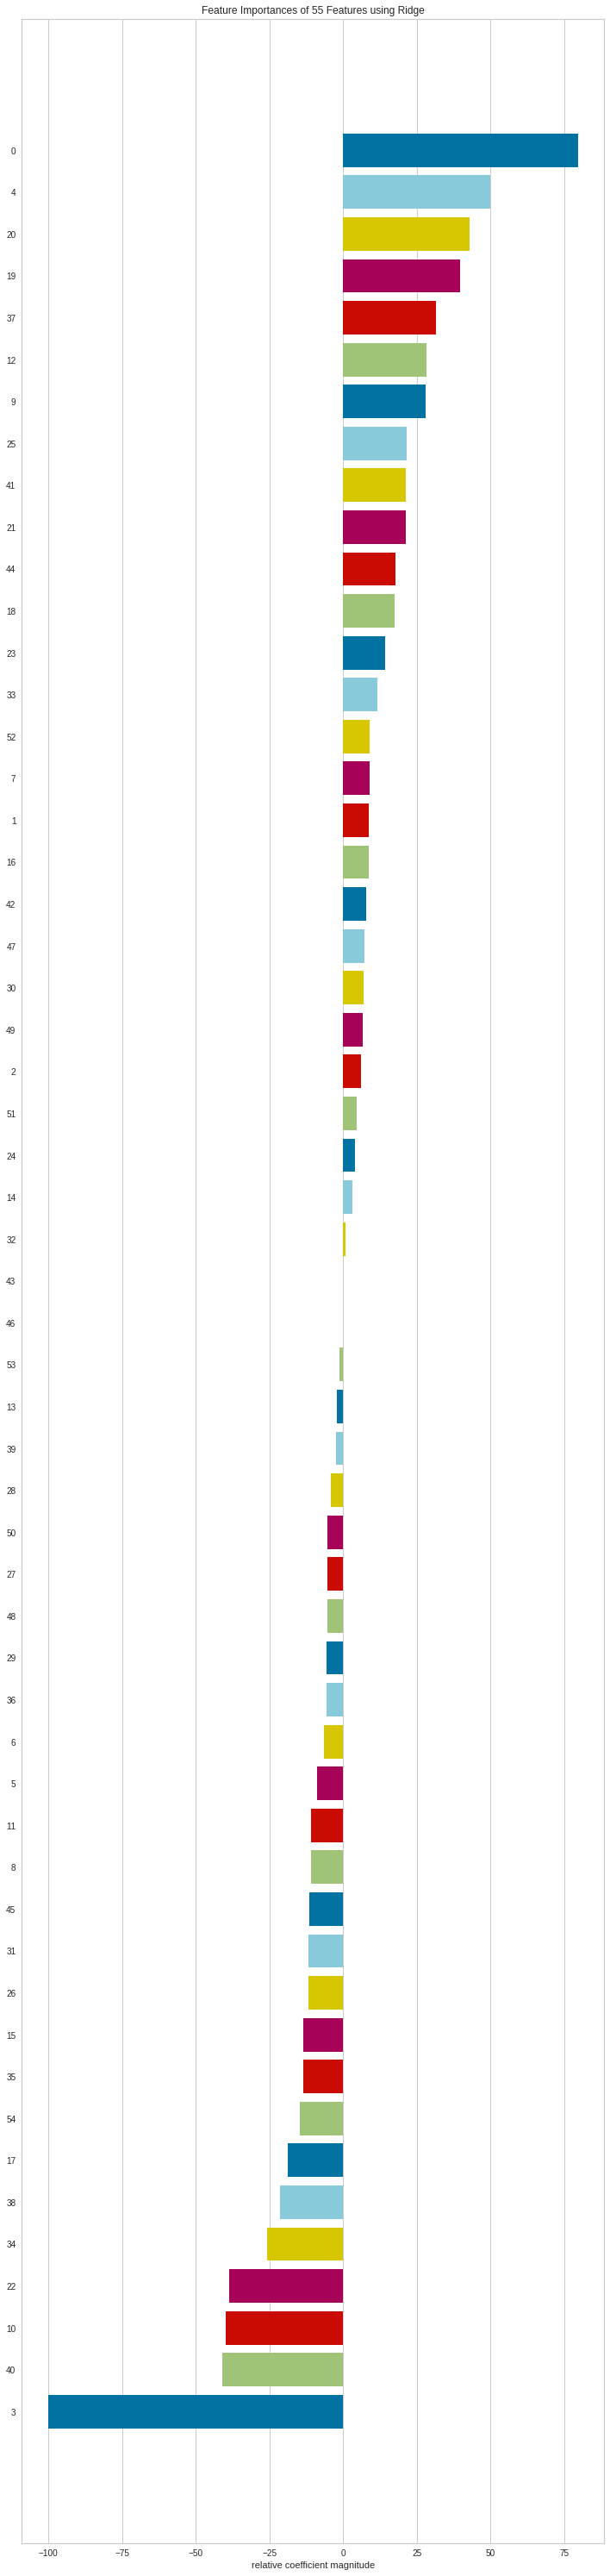

In [642]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature importances with Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e-01, tolerance: 3.684e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


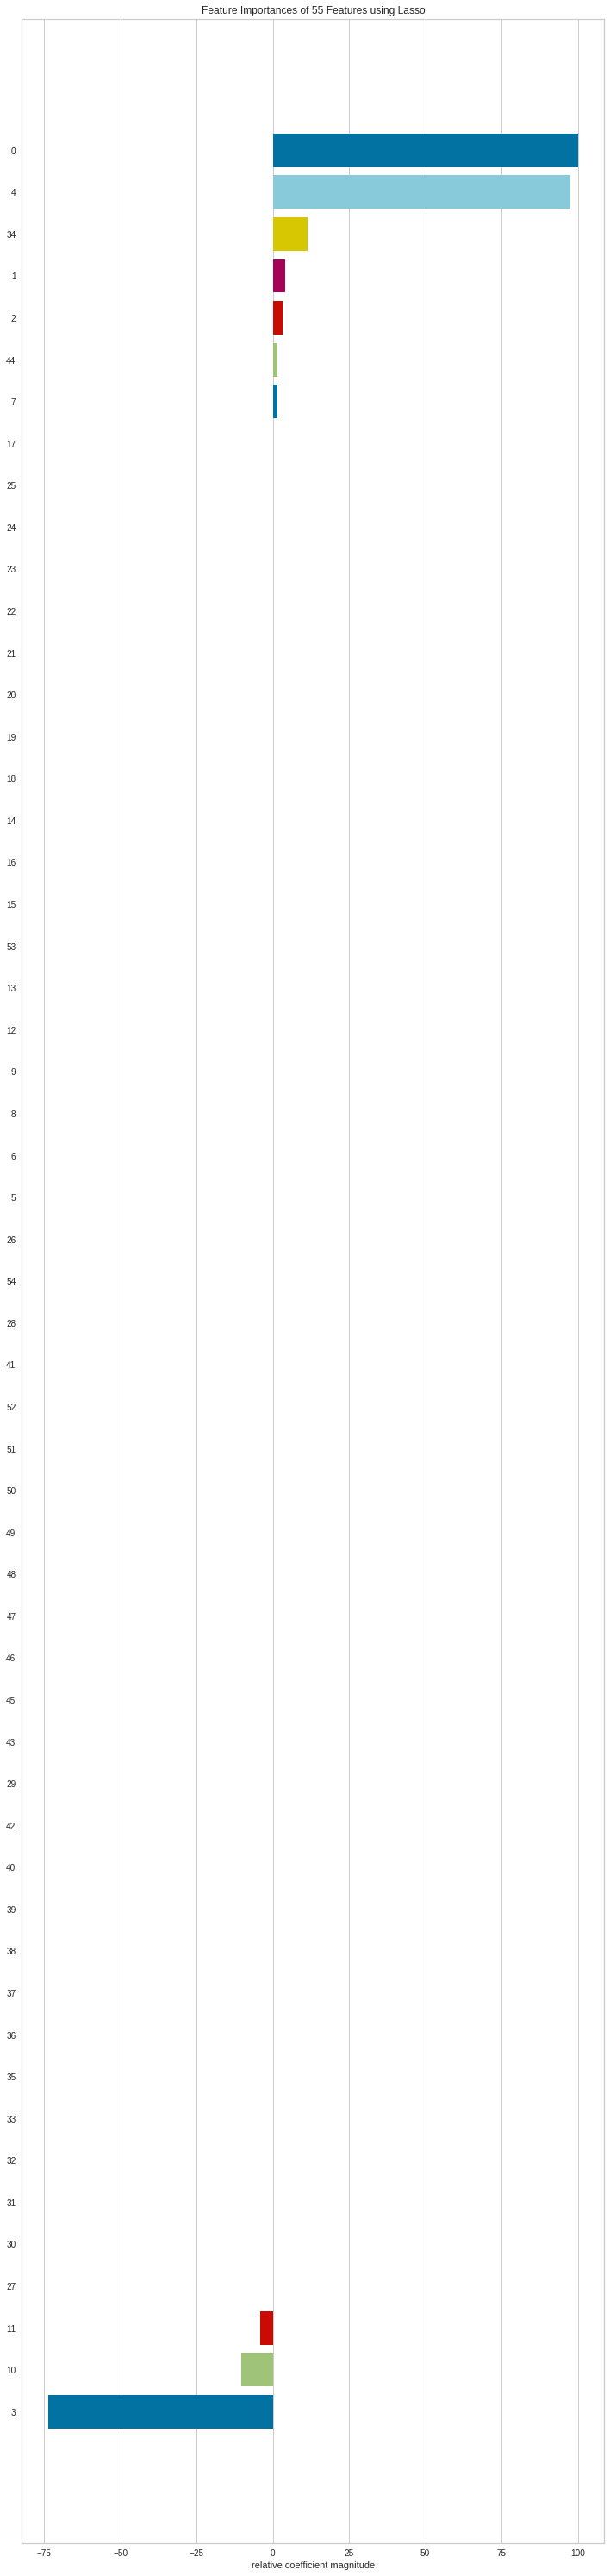

In [643]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature Selection

In [644]:
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]
X_new

,0,3,4
0,230.1,52946.01,8697.78
1,44.5,1980.25,1748.85
2,17.2,295.84,789.48
3,151.5,22952.25,6256.95
4,180.8,32688.64,1952.64
...,...,...,...
195,38.2,1459.24,141.34
196,94.2,8873.64,461.58
197,177.0,31329.00,1646.10
198,283.6,80428.96,11911.20


In [645]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [646]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

In [647]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)

Lasso(alpha=0.01)

In [648]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

In [649]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

,lasso_new_train,lasso_new_test
R2,0.982056,0.987284
mae,0.429271,0.515009
mse,0.465402,0.401370
rmse,0.682204,0.633538


### lasso scores for 10 features

grid_lasso_train	grid_lasso_test
R2	    0.987457	0.989858
mae	    0.354610	0.447532
mse	    0.325331	0.320103
rmse	0.570378	0.565776

In [650]:
lasso_model2 = Lasso(max_iter=1000000, alpha=0.001)

In [651]:
lasso_model2.fit(X_train_scaled, y_train)

Lasso(alpha=0.001, max_iter=1000000)

In [652]:
y_pred = lasso_model2.predict(X_test_scaled)
y_train_pred = lasso_model2.predict(X_train_scaled)

In [655]:
 train_val(y_train, y_train_pred, y_test, y_pred, "lasso_001")

,lasso_001_train,lasso_001_test
R2,0.993237,0.988737
mae,0.267250,0.390625
mse,0.177967,0.317991
rmse,0.421862,0.563906


In [ ]:
      grid_lasso_train	 grid_lasso_test
R2	  0.987457	         0.989858
mae	  0.354610	         0.447532
mse	  0.325331	         0.320103
rmse  0.570378	         0.565776